# Differential equation

Differential equation, for example 1st order in derivative can be written as: $$\frac{dx}{dt}= f(t,x)$$ 


$$ x(t_0)=x_0$$

$$ t \in [t_0, \infty] $$

this is called also an $$\textbf{initial value problem}$$

# Examples

$$ \frac{dx}{dt} = \sin(t) $$

this can be solved directly using integration. The solution is then:

$$ x(t) = -\cos(t) $$

Another example:
$$ x(0) = \frac{1}{2} $$
$$ \frac{dx}{dt} = -\cos(t)\cdot x $$

this can solved exactly using separation of variables and integration. The solution is:

$$ x(t) = \frac{1}{2} e^{-\sin(t)} $$ 

Sometimes there is no analytical solutions. We need to use numerical solutions using computers.

# Euler method

# Step 1: discretize time

to use computers we discretize $ t $ into equal intervals. Then our problem is only defined at those time points.
$$ t \in \{t_0, t_1, t_2,...., t_N\} $$

$$ x(t) \in \{x(t_0), x(t_1),x(t_2),...., x(t_N) \} $$


The more discretizations, the better is our numerical calculations.

Our problem is:


$$\frac{dx}{dt}= f(t,x)$$ 

$$ x(t_0)=x_0$$

$$ t \in [t_0, \infty] $$

# Step 2: we find the next value of x:

The difference between two time steps is $h = t_{n+1} - t_{n} $. The derivative is then:

$$ \frac{x_{n+1} -x_{n}}{h} = f(t_n,x_n) $$

Then, we can find the next value of $x$ as:

$$ x_{n+1} = x_n + h f(t_n,x_n) $$

# Example:

$$ x(0) = 1 $$


$$ \frac{dx}{dt} = x  $$


We know the solution is:

$$ x = e^{t} $$


Let us apply the Euler method here, $h =1$:

$$ x_0 = 1 $$

$$ x_1 = x_0 + x_0 = 2 $$

$$ x_2 = x_1 + x_1 = 4 $$

$$ x_3 = x_2 + x_2 = 8 $$

$$ \vdots $$

$$ x_9 = x_8 +x_8 $$

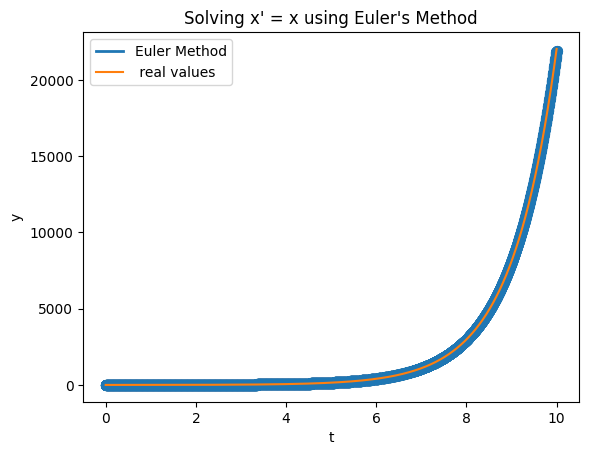

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#x(0) = 1
# x' = x, f(t,x) = x

# h = t_n+1 - t_n

def f(t,x):
    
    return x


# Euler method implementation

def euler_method(f,t_0,x0, h, t_end):
    t_values = np.arange(t_0, t_end+h, h)
    x_values = np.zeros(len(t_values))
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        x_values[i] = x_values[i-1] + h * f(t_values[i-1], x_values[i-1] )
        
    return t_values, x_values

t0 = 0 
x0 = 1
h = 0.001
t_end = 10



t_values, x_values = euler_method(f,t0, x0, h, t_end)

# real solution, x = e^t



plt.plot(t_values, x_values, label='Euler Method', lw = 2)
plt.scatter(t_values, x_values, lw = 2)
plt.plot(t_values, np.exp(t_values), label = ' real values')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Solving x' = x using Euler's Method")
plt.show()





    
    





# Example 2: pendulum with air resistance and no small angle approximation 


<div>
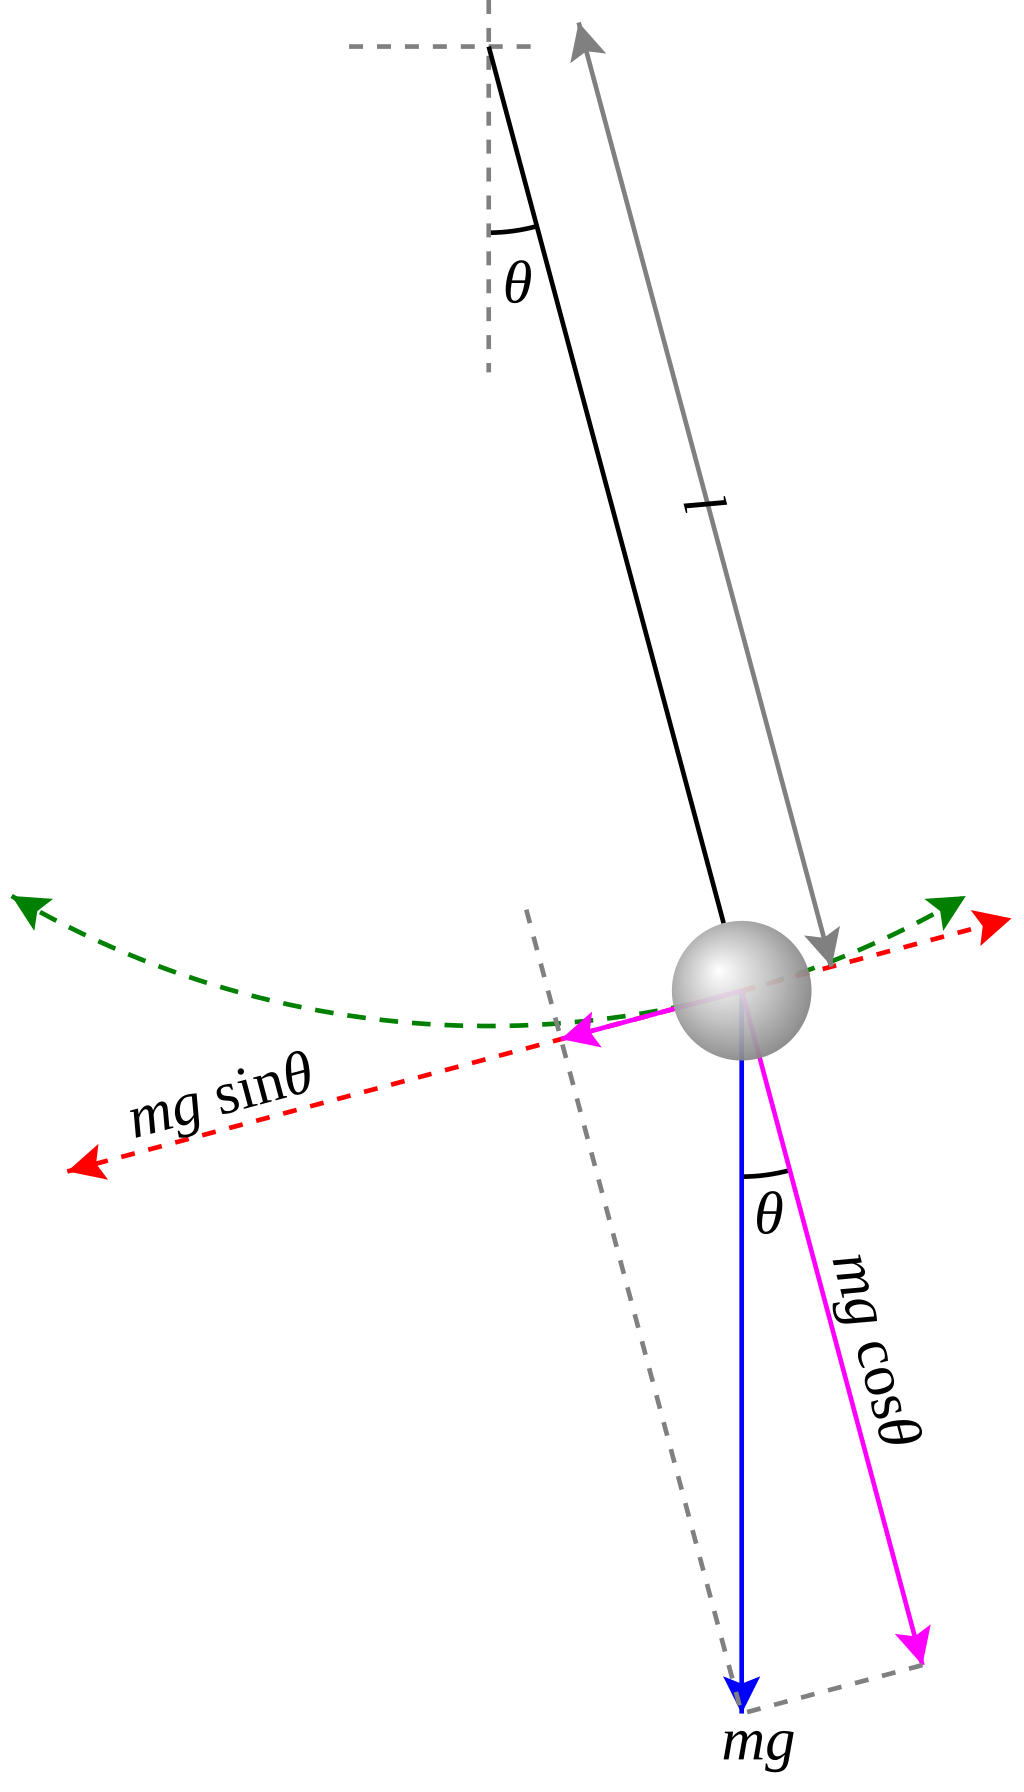
</div>

The equation of motion of pendulum is: 


$$ ml^2\frac{d^2\theta}{dt^2} = -mgl\sin(\theta)  $$

$$ \frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta)  $$




This equation can be solved easily with small angle approximation $\theta << 1$:


$$ \frac{d^2\theta}{dt^2} = -\frac{g}{l}\theta  $$

The solution is:

$$ \theta(t) = \theta_0\cos(\omega_0t) $$

$$ \omega_0 = \sqrt{\frac{g}{l}} $$





# Adding air resistance

we can add an air resistance term :

$$ -b \frac{d\theta}{dt} $$

and not use small angle approximation. We get thus:


$$ ml^2\frac{d^2\theta}{dt^2} = -mgl\sin(\theta) -b \frac{d\theta}{dt} $$



We have to convert it to first order differential equation to use Euler method:


$$\frac{d\theta}{dt}= \omega $$


$$ \frac{d\omega}{dt} = -\frac{g}{l}\sin(\theta) -b \omega $$


We can use the Euler method:

$$ \theta \in \{\theta_0, \theta_1, \theta_2,...., \theta_N\} $$

$$ \omega \in \{\omega_0, \omega_1, \omega_2,...., \omega_N\} $$


The Euler step is:

$$ \theta_{n+1} = \theta_n + h\omega $$
$$ \omega_{n+1} = \omega_{n} + hf(\theta_n) $$

# In Python we can do this as:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib.patches import Rectangle 
## omega' = -g/L *sin(theta) -b*omega

## t0 = 0
def pendulum_derivative(theta, omega, L, g, b):
    return -g / L * np.sin(theta) - b *omega


def simulate_pendulum(theta0, omega0, L, g, b, t_max, h):
    t = np.arange(0, t_max, h)
    theta = np.zeros(len(t))
    omega = np.zeros(len(t))
    
    theta[0] = theta0
    omega[0] = omega0
    
    for i in range(1, len(t)):
        
        f = pendulum_derivative(theta[i-1], omega[i-1], L, g, b)
        omega[i] = omega[i-1] + f * h
        theta[i] = theta[i-1] + omega[i] * h
        
    return t, theta, omega


L = 1.0 
g = 0.16* 9.81 
b = 0.1
theta0 = np.pi/4
omega0 = 0

t_max = 80
h = 0.05

t, theta, omega = simulate_pendulum(theta0, omega0, L, g, b, t_max, h)

print(t)
print(theta)
print(omega)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2*L, 1.2*L)
ax.set_ylim(-1.2*L, 1.2*L)

ax.set_aspect('equal')

ax.grid(True)

line, = ax.plot([],[], 'k-', linewidth = 2)
bob, =ax.plot([],[], 'ro', markersize = 10)
time_text = ax.text(0.02, 0.95, '', transform = ax.transAxes)

ceiling_width = 2.4*L
ceiling_height = 0.1*L
ceiling = Rectangle((-ceiling_width/2, 0), ceiling_width, ceiling_height, 
                    facecolor='gray', edgecolor='black')

ax.add_patch(ceiling)

def init():
    line.set_data([], [])
    bob.set_data([], [])
    time_text.set_text('')
    return line, bob, time_text


def update(frame):
    x = L * np.sin(theta[frame])
    y = -L * np.cos(theta[frame])
    
    line.set_data([0, x], [0, y])
    bob.set_data([x], [y])
    time_text.set_text(f'Time: {t[frame]:.2f} s')
    return line, bob, time_text


anim = FuncAnimation(fig, update, frames = len(t), init_func = init, blit = True, interval = h* 1000 )

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation
anim.save('pendulum_animation.mp4', writer=writer)

plt.close(fig)

print("Animation saved as 'pendulum_animation.mp4'")

[0.000e+00 5.000e-02 1.000e-01 ... 7.985e+01 7.990e+01 7.995e+01]
[0.78539816 0.78262348 0.77709569 ... 0.00857291 0.00923565 0.00985885]
[ 0.         -0.05549374 -0.11055582 ...  0.01399772  0.01325494
  0.01246386]
Animation saved as 'pendulum_animation.mp4'
